In [2]:
import numpy as np
import matplotlib.pyplot as plt


Considere $N=7$ ondas electromagnéticas planas linealmente polarizadas correspondientes a luz de longitud de onda de $21$ cm. 
Estas ondas tienen una amplitud de campo eléctrico igual a 10$^{-4}$ V/m. 
Las amplitudes de los campos el\'ectricos apuntan en la misma direcci\'on del espacio y el desfase $\varepsilon$ entre diferentes ondas es nulo. 
Además, los siete vectores de onda son coplanares y el ángulo entre $\vec{k}_i$ y $\vec{k}_{i+1}$ es $5$ grados. 
Grafique el promedio temporal del vector de Poynting sobre un eje que es perpendicular al vector de onda y al vector de campo el\'ectrico  de la primera onda plana. 
Tome un rango de posiciones sobre el eje de tal manera que sean visibles al menos tres m\'aximos de la intensidad.

In [93]:
def intensity_at_time_t(omega_t=0.0):
    delta_theta = 5.0

    n_points = 10000
    k = np.pi*2.0/0.21
    y = np.linspace(-150/k, 150/k, n_points)

    E_T = np.zeros(n_points)
    for i in range(7):
        theta_i = np.deg2rad(delta_theta * i)
        E_i =  np.cos(k*y*np.sin(theta_i) + omega_t)
        E_T += E_i
    
    c = 3.0E8 # m/s
    E_0 = 1E-4 # V/m
    epsilon_0 = 8.85E-12 # F/m
    return y, c * epsilon_0* (E_0**2) * (E_T**2)

In [94]:
y_0, I_0 = intensity_at_time_t(omega_t=0.0)

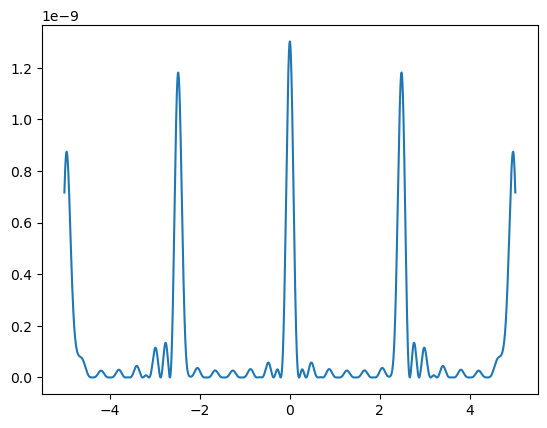

In [95]:
plt.plot(y_0, I_0)

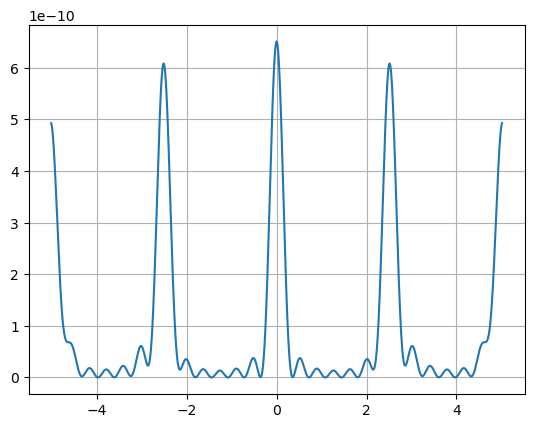

In [96]:
n_points_t = 1000
omega_t_values = np.linspace(0, 30.0*np.pi, n_points_t)

I_average = np.zeros(len(I_0))

for omega_t in omega_t_values:
    y, I = intensity_at_time_t(omega_t=omega_t)
    I_average += I
    
I_average = I_average/n_points_t

plt.plot(y, I_average)
plt.grid()